<a href="https://colab.research.google.com/github/DoNotChoke/SupervisedLearning/blob/main/SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification (Iris Dataset)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
data= pd.read_csv('iris (1).csv')

In [19]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
data.groupby('Species').size()

,0
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


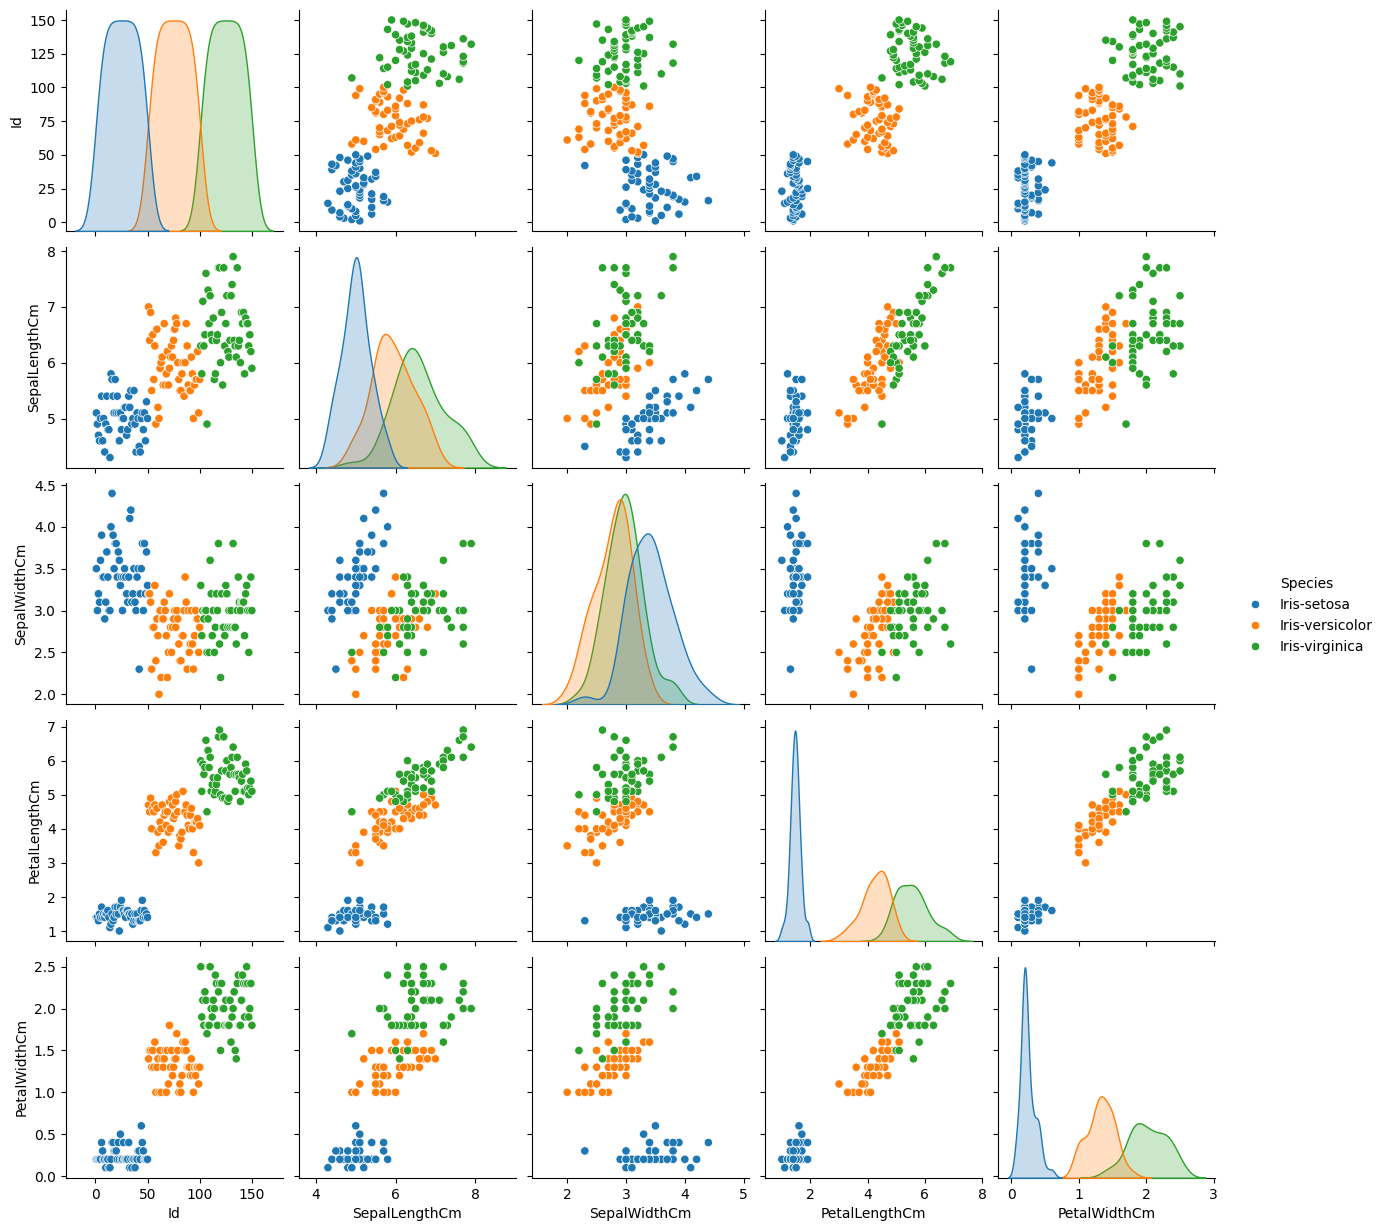

In [23]:
sns.pairplot(data, hue= 'Species')

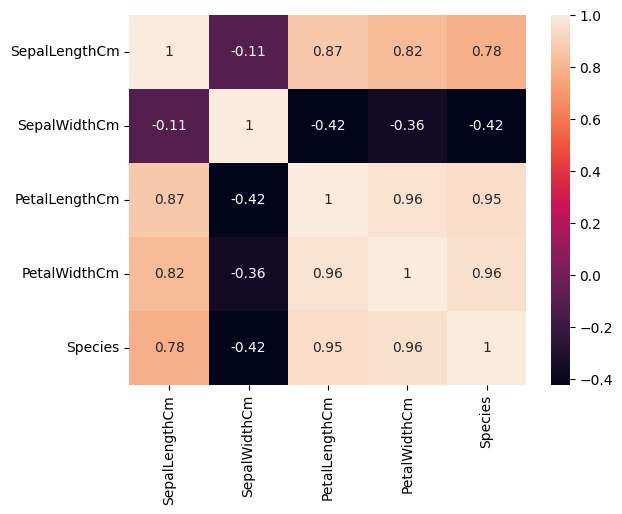

In [26]:
sns.heatmap(data.corr(), annot= True)
plt.show()

In [24]:
data.drop(['Id'], axis=1, inplace= True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
# Encode the labels
le= LabelEncoder()
labels= data["Species"]
data["Species"]= le.fit_transform(labels)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
x= data.iloc[:,0:4]
y= data.iloc[:,4]

In [28]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size= 0.3 , random_state=42)

In [29]:
X_train.shape

(105, 4)

In [30]:
# train model
decision_tree = DecisionTreeClassifier(criterion= 'entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
y_pred= decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro') # TP/(TP + FP) --> độ chính xác trên class đấy cao
recall =  recall_score(y_test, y_pred,  average='micro') #TP/(tp +fn) --> không bị lẫn sang class
f1 = f1_score(y_test, y_pred, average='micro') # f1 = 2 * p * r /(p + r) --> chỉ số trung hòa
print('accuracy decisionTree: %.3f' %accuracy)
print('precision decisionTree: %.3f' %precision)
print('recall decisionTree: %.3f' %recall)
print('f1-score decisionTree : %.3f' %f1)

accuracy decisionTree: 1.000
precision decisionTree: 1.000
recall decisionTree: 1.000
f1-score decisionTree : 1.000


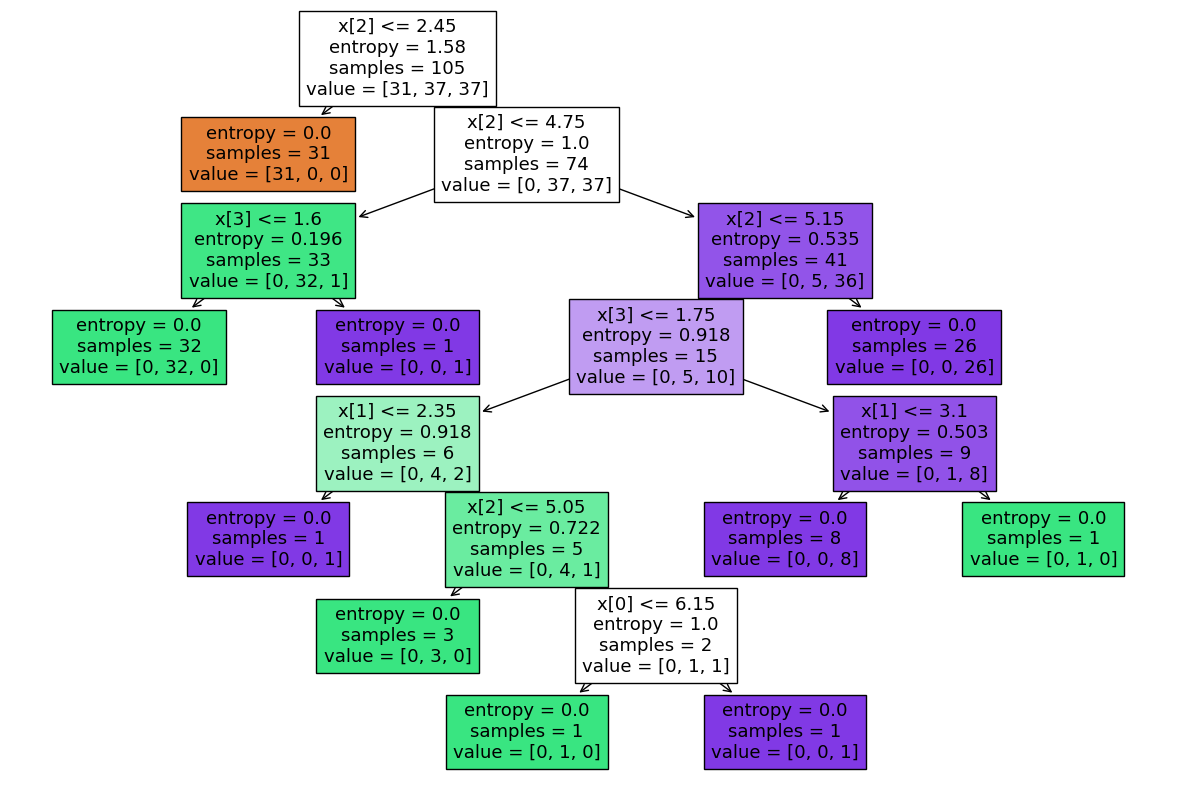

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize= (15,10))
plot_tree(decision_tree.fit(X_train, y_train), filled= True)
plt.show()

In [33]:
knn= KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred= knn.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('accurac kNN : %.3f' %accuracy)
print('precision kNN : %.3f' %precision)
print('recall kNN: %.3f' %recall)
print('f1-score kNN : %.3f' %f1)

accurac kNN : 1.000
precision kNN : 1.000
recall kNN: 1.000
f1-score kNN : 1.000


## Regression (Housing dataset)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
data= pd.read_csv('housing.csv')

In [38]:
data

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [41]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", delimiter=r"\s+", names=column_names)

In [42]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [44]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


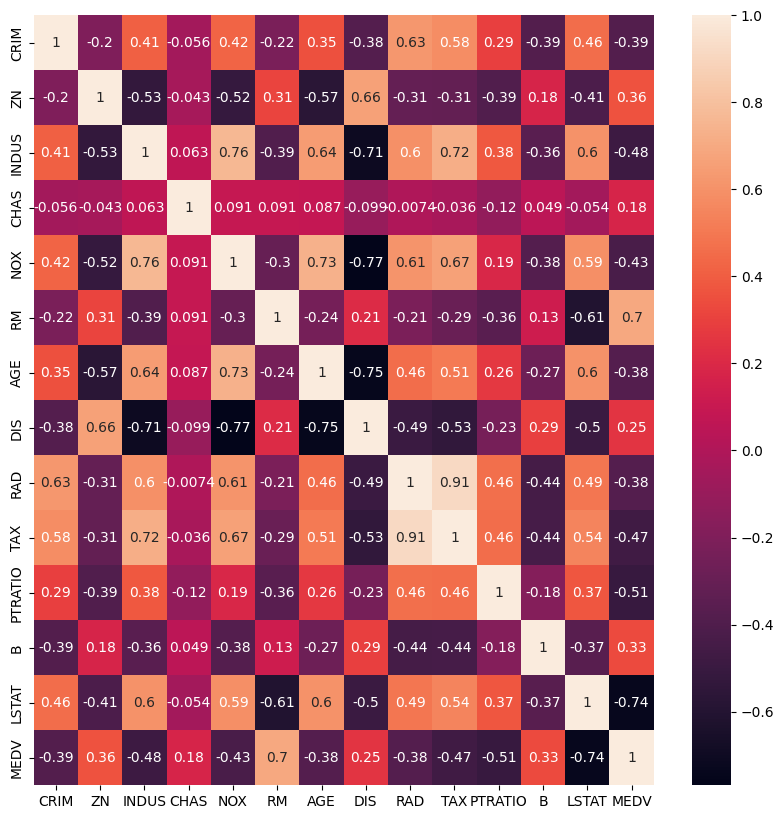

In [45]:
plt.subplots(figsize= (10,10))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [51]:
def drop_duplicate_cols(table1: pd.DataFrame, label1: np.ndarray, threshold:float = 0.9):
    """
    Xóa các đặc trưng có hệ số tương quan cao trong dữ liệu
    """
    table = table1.copy()
    label = label1.copy()

    table['MEDV'] = label
    # Lấy giá trị tuyệt đối các giá trị trong bảng
    corr_matrix = table.drop(['MEDV'], axis = 1).corr().abs()
    # Ma trận tương quan với MEDV
    corr_medv = table.corr()[['MEDV']].abs()
    # Tạo ma trận tam giác trên từ corr_matrix
    up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    drop = list()

    for row in range(len(up)-1):
        col_idx = row + 1
        # row != col
        for col in range (col_idx, len(up)):
            if(corr_matrix.iloc[row, col] > threshold):
                if(corr_medv.iloc[row,0] > corr_medv.iloc[col,0]):
                    drop.append(col)
                else:
                    drop.append(row)

    drop_set = list(set(drop))
    dropcols_names = list(table.columns[[item for item in drop_set]])

    return (dropcols_names)

In [52]:
drop_duplicate_cols(data, data['MEDV'], 0.9)

['RAD']

In [53]:
data.drop(['RAD'], axis= 1, inplace= True)

In [54]:
X_train, X_test, y_train, y_test= train_test_split(data.drop(['MEDV'], axis=1), data['MEDV'],test_size= 0.2, random_state= 42)

In [55]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [61]:
linear_regression= LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred= linear_regression.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  26.470945619590683
R2:  0.639034773895141
